# 1.Importing required Libraries 

In [1]:
!pip install seaborn


  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)


In [2]:
import yfinance as yf
from datetime import datetime

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from itertools import cycle
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# 2. IMPORT DATASET

In [3]:
# Defining Parameters
#start_date = datetime(2014,1,2)
#end_date = datetime(2024,1,6)

# Data downloading
#Apple_Stock  = yf.download('AAPL',start=start_date,end=end_date)
#Apple_Stock 

In [4]:
# Load the dataset 
Apple_Stock = pd.read_csv(r"C:/Users/Mandar/Downloads/Project File/My project/apple_stock.csv")
Apple_Stock.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000
2474,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000


In [5]:
Apple_Stock.shape

(2475, 7)

# EDA And Visulization

In [6]:
# Display basic information about the dataset
Apple_Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


Here are all of column having float data type except 'Date' & Volume'.

In [7]:
# Display summary statistics of numerical columns
Apple_Stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


We can see in dataset the dataset having 2457 days of stock history.

In [8]:
# Check for missing values
Apple_Stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

in the dataset there is no Missing Values

In [9]:
# check for any duplicate values
Apple_Stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2470    False
2471    False
2472    False
2473    False
2474    False
Length: 2475, dtype: bool

In the dataset there is no Duplicate Values

In [10]:
#Convert 'Date' column to datetime for  use of various time-related functions and analyses.
Apple_Stock['Date'] = pd.to_datetime(Apple_Stock['Date']) 

In [11]:
#Find the duration of dataset
Starting_date = Apple_Stock.iloc[0][0]
Ending_date = Apple_Stock.iloc[-1][0]
Duration = Apple_Stock.iloc[-1][0]-Apple_Stock.iloc[0][0]

print("Starting date: ",Apple_Stock.iloc[0][0])
print("Ending date: ", Apple_Stock.iloc[-1][0])
print("Duration: ", Apple_Stock.iloc[-1][0]-Apple_Stock.iloc[0][0])

Starting date:  2014-01-02 00:00:00
Ending date:  2023-10-31 00:00:00
Duration:  3589 days 00:00:00


The dataset Contain Apple stock history from 01-02-2014 to 31-10-2023

Total days of duration with weekends is 3589. 

The Stock market was closed on weekends,So After Removing weekends we have 2475 days data

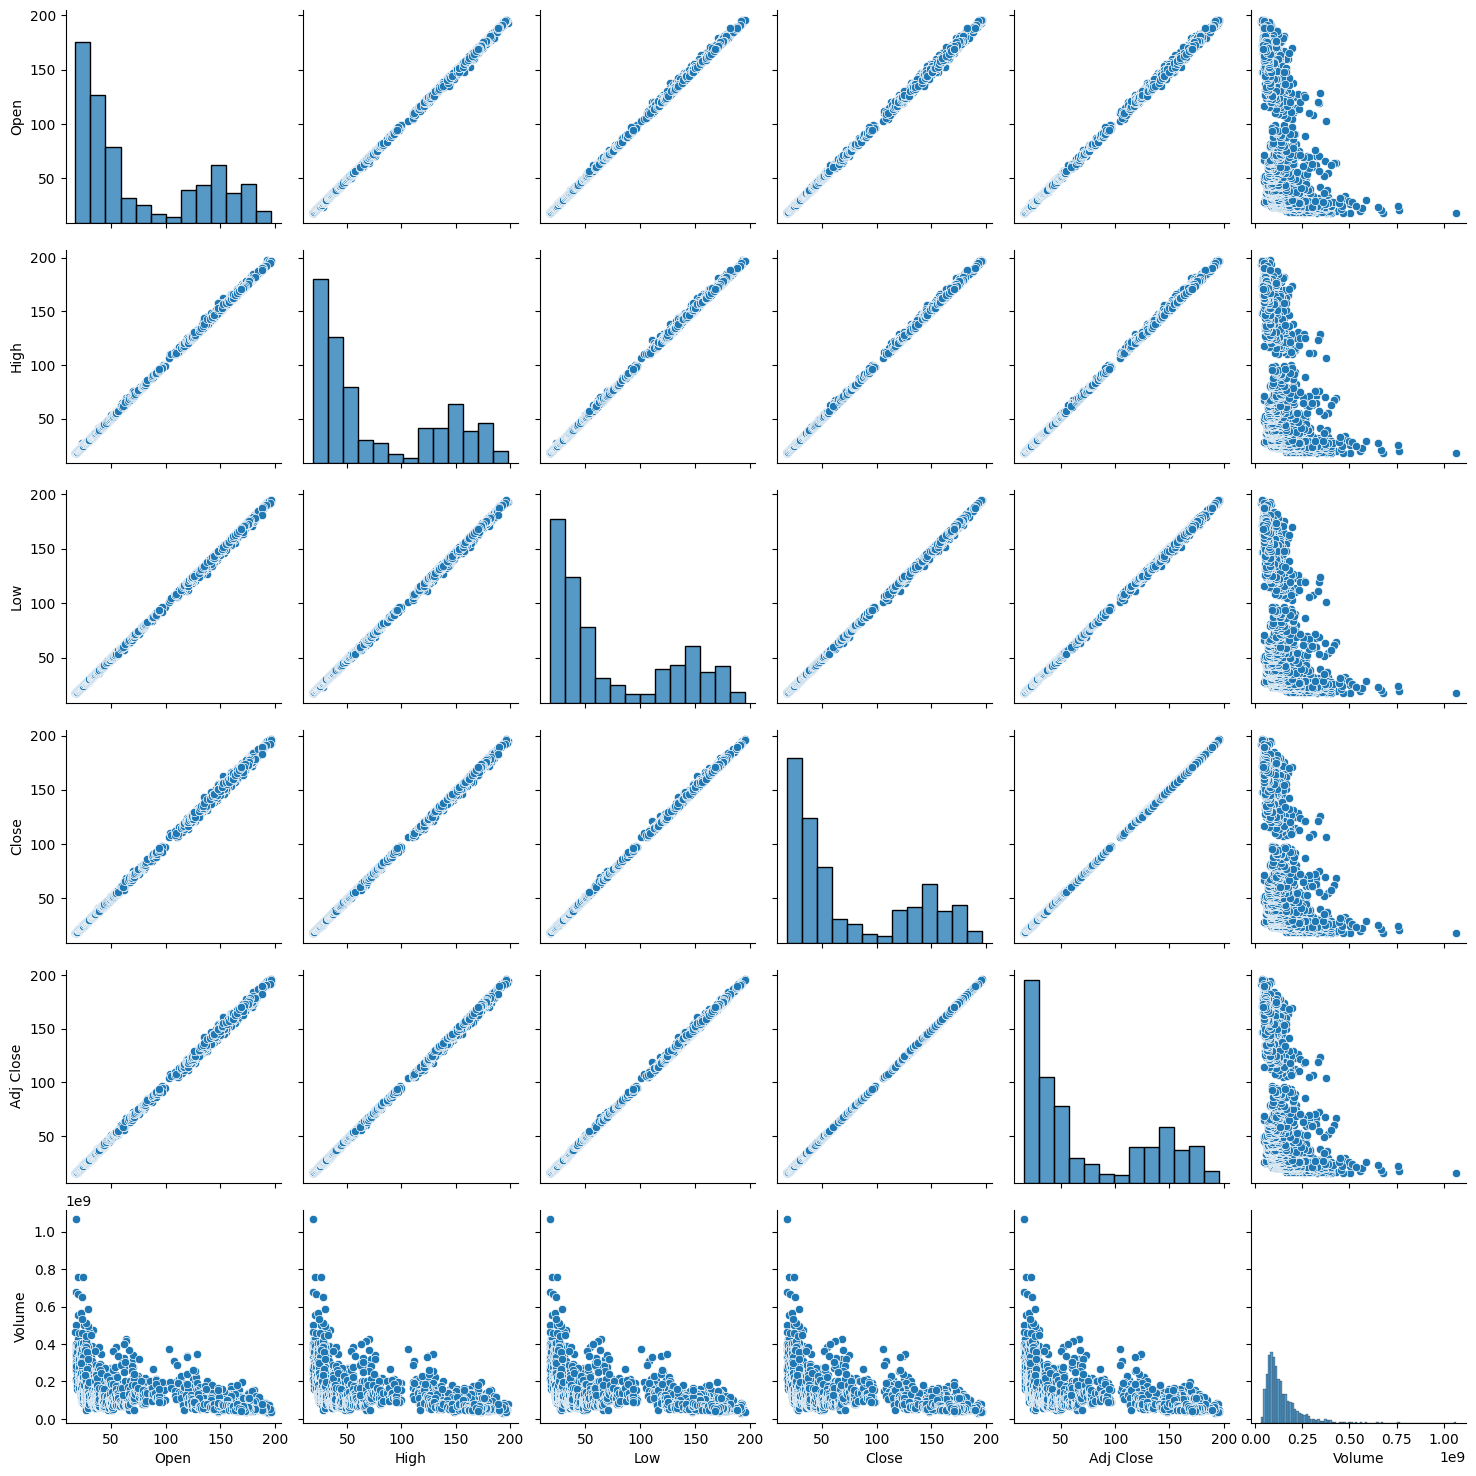

In [12]:
#visualize and understand the datset using pairplot
sns.pairplot(Apple_Stock)
plt.show()

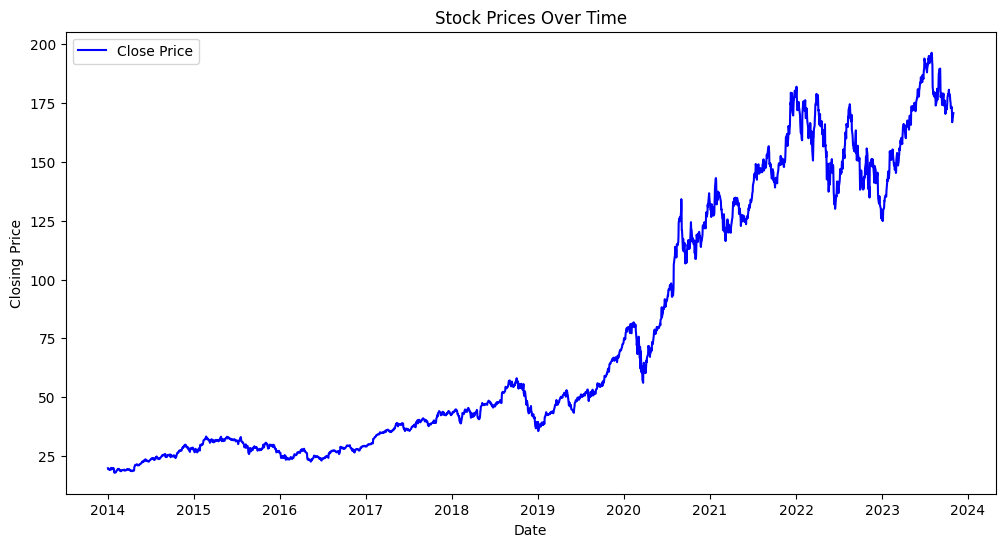

In [13]:
# Plot line plot of stock prices over time(Yearly) for Analysis
plt.figure(figsize=(12, 6))
plt.plot( Apple_Stock['Date'], Apple_Stock['Close'], label='Close Price', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

The line plot shows the general trend of the stock from 2014 to the present.

In the plot we see the stock is continously and rapidally Increasing After 2019.

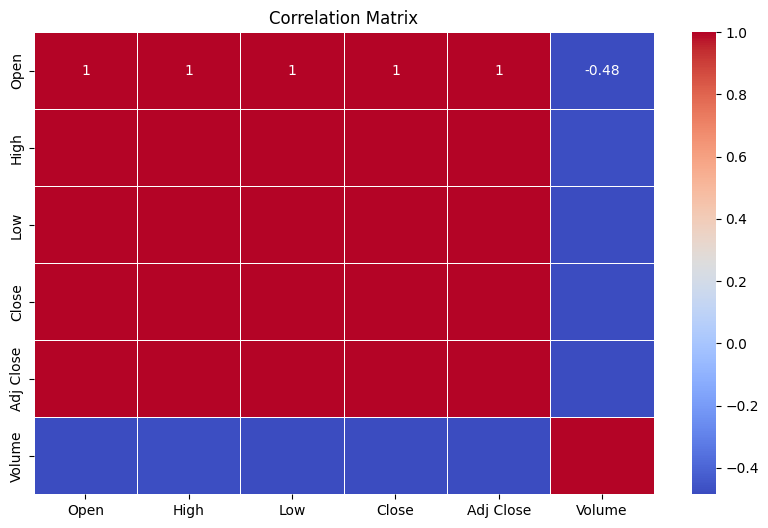

In [14]:
# Plot a correlation matrix for numerical variables
correlation_matrix = Apple_Stock[['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# check outliers in the dataset

In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = Apple_Stock[['Date','Open','Close','Volume']].quantile(0.25)
Q3 = Apple_Stock[['Date','Open','Close','Volume']].quantile(0.75)


In [20]:
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((Apple_Stock[['Date','Open', 'Close', 'Volume']] < lower_bound) | (Apple_Stock[['Date','Open', 'Close', 'Volume']] > upper_bound)).any(axis=1)

# Print the rows containing outliers
print("Data with Outliers:")
print(Apple_Stock[outliers])

Data with Outliers:
           Date        Open        High         Low       Close   Adj Close  \
1    2014-01-03   19.745001   19.775000   19.301071   19.320715   16.938305   
2    2014-01-06   19.194643   19.528570   19.057142   19.426071   17.030676   
3    2014-01-07   19.440001   19.498571   19.211430   19.287144   16.908880   
6    2014-01-10   19.279642   19.314285   18.968214   19.033571   16.686569   
7    2014-01-13   18.925358   19.375000   18.924286   19.133215   16.773926   
...         ...         ...         ...         ...         ...         ...   
1656 2020-07-31  102.885002  106.415001  100.824997  106.260002  104.048485   
1657 2020-08-03  108.199997  111.637497  107.892502  108.937500  106.670258   
1671 2020-08-21  119.262497  124.867500  119.250000  124.370003  122.001152   
1672 2020-08-24  128.697495  128.785004  123.937500  125.857498  123.460304   
1681 2020-09-04  120.070000  123.699997  110.889999  120.959999  118.656097   

         Volume  
1     3924676

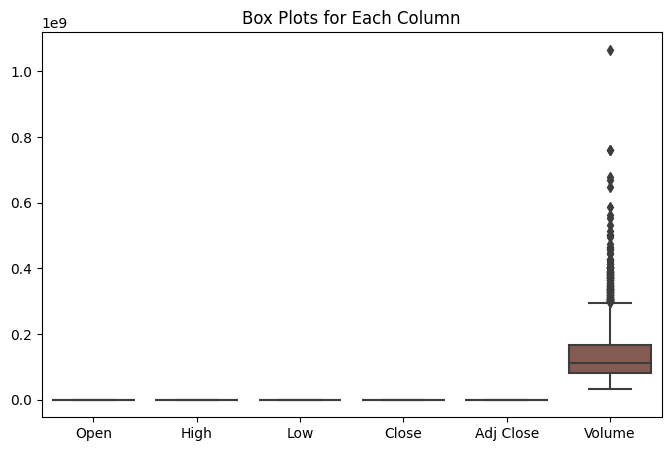

In [21]:
# Create box plots for each relevant column
plt.figure(figsize=(8, 5))
sns.boxplot(data=Apple_Stock[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.title('Box Plots for Each Column')
plt.show()

dataset having 125 outliers 


we need to drop these outliers

In [22]:
#Drop outliers from the DataFrame
Apple_Stock_no_outliers = Apple_Stock[~outliers]

#Print the DataFrame without outliers
print("Data without Outliers:")
print(Apple_Stock_no_outliers)

Data without Outliers:
           Date        Open        High         Low       Close   Adj Close  \
0    2014-01-02   19.845715   19.893929   19.715000   19.754642   17.318729   
4    2014-01-08   19.243214   19.484285   19.238930   19.409286   17.015959   
5    2014-01-09   19.528570   19.530714   19.119642   19.161428   16.798664   
10   2014-01-16   19.817858   19.887501   19.702856   19.794643   17.353794   
24   2014-02-06   18.216429   18.339287   18.136070   18.303928   16.142956   
...         ...         ...         ...         ...         ...         ...   
2470 2023-10-25  171.880005  173.059998  170.649994  171.100006  170.874893   
2471 2023-10-26  170.369995  171.380005  165.669998  166.889999  166.670425   
2472 2023-10-27  166.910004  168.960007  166.830002  168.220001  167.998672   
2473 2023-10-30  169.020004  171.169998  168.869995  170.289993  170.065933   
2474 2023-10-31  169.350006  170.899994  167.899994  170.770004  170.545319   

         Volume  
0     2346

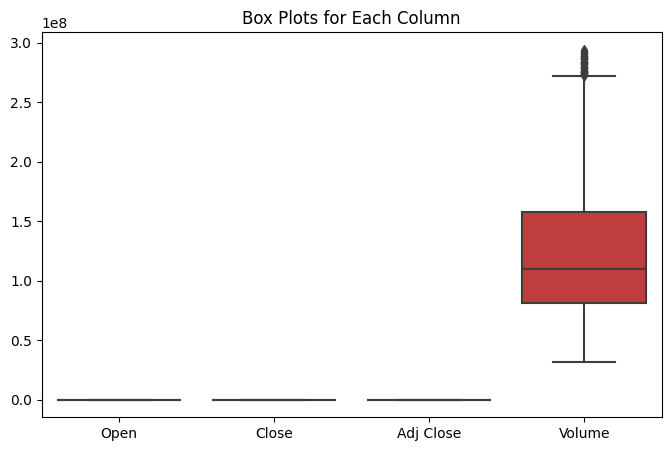

In [23]:
# Create box plots for each relevant column
plt.figure(figsize=(8, 5))
sns.boxplot(data=Apple_Stock_no_outliers[['Open', 'Close', 'Adj Close', 'Volume']])
plt.title('Box Plots for Each Column')
plt.show()

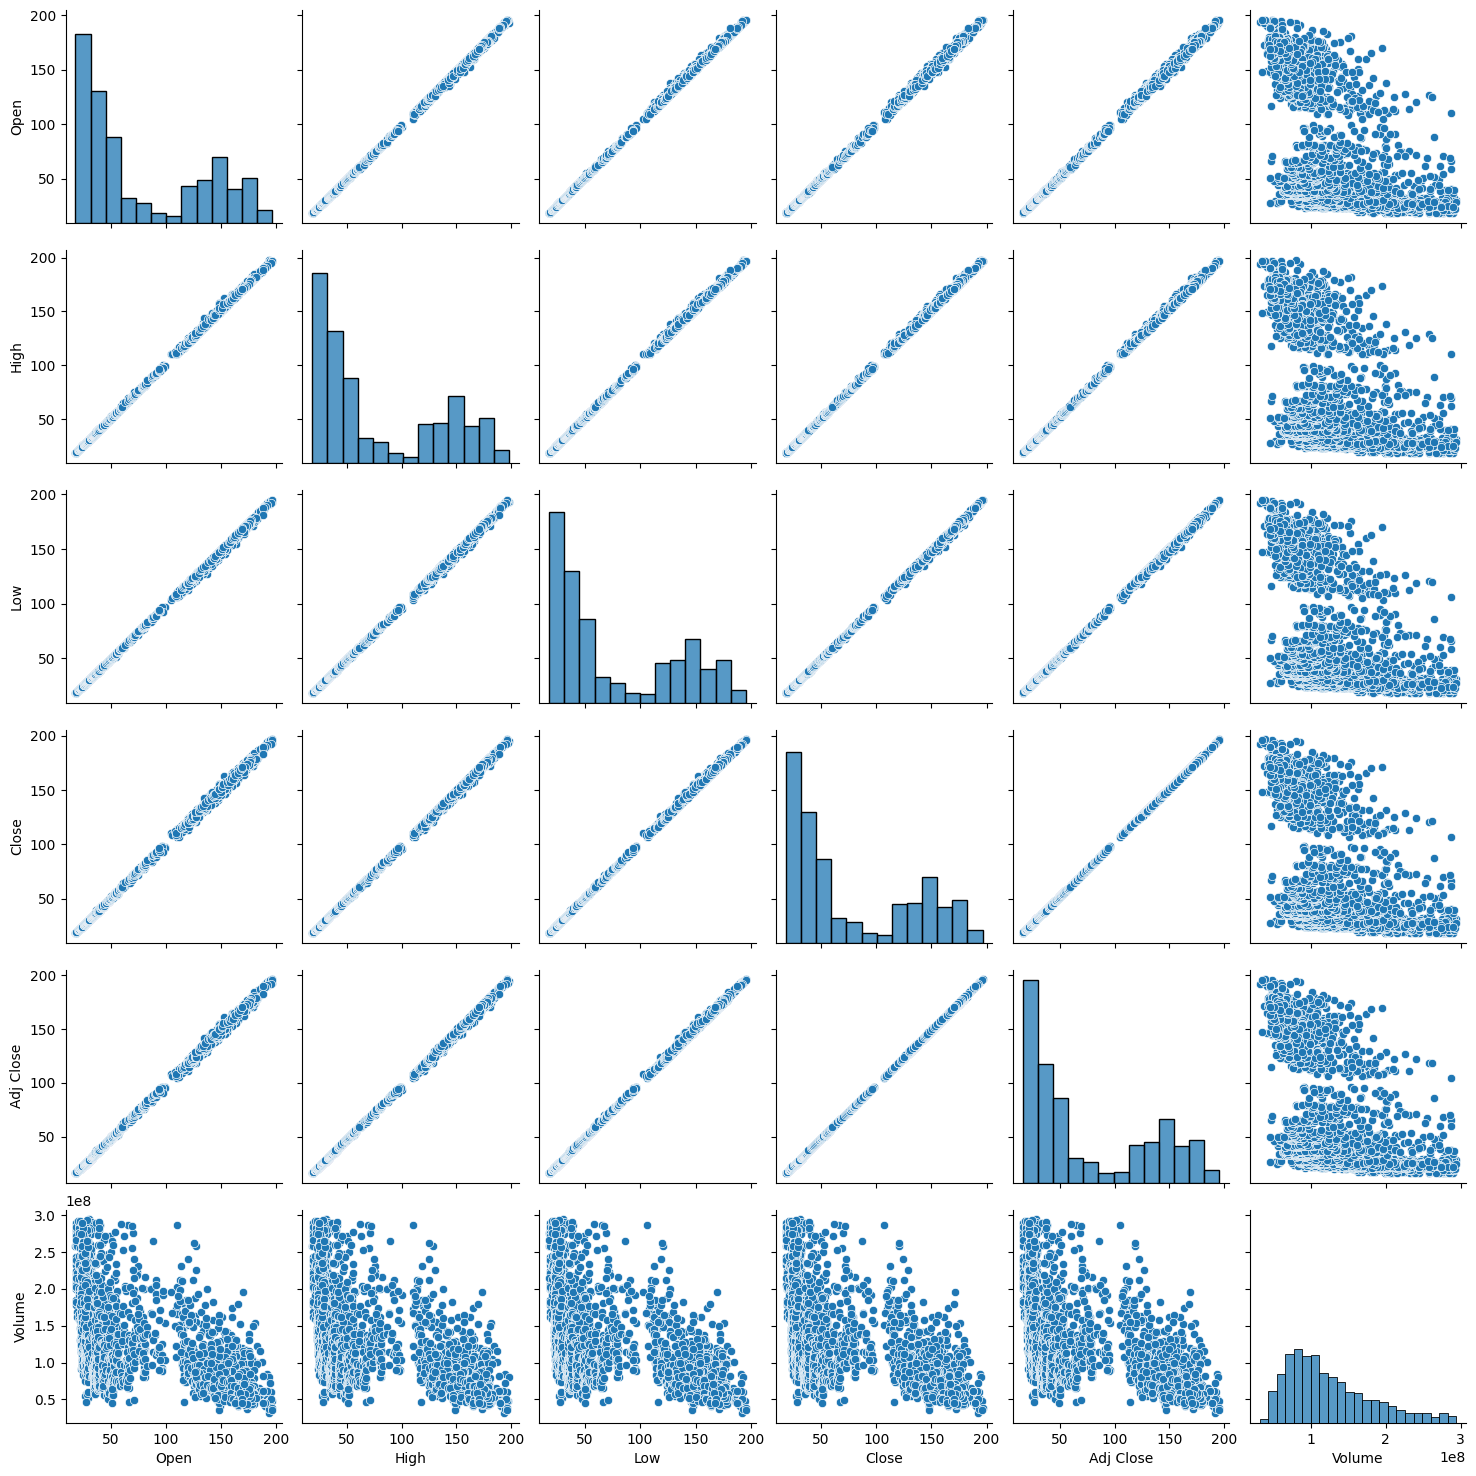

In [24]:
#visualize and check effect on the dataset after removing outliers
sns.pairplot(Apple_Stock_no_outliers)
plt.show()

# Feature Engineering

In [25]:
#calculate daily return
Apple_Stock_no_outliers['Daily_Return'] =  Apple_Stock_no_outliers['Close'].pct_change()
Apple_Stock_no_outliers['Daily_Return']

0            NaN
4      -0.017482
5      -0.012770
10      0.033046
24     -0.075309
          ...   
2470   -0.013492
2471   -0.024606
2472    0.007969
2473    0.012305
2474    0.002819
Name: Daily_Return, Length: 2350, dtype: float64

Positive values in the 'Daily_Return' column indicate a positive daily return, implying an increase in the closing price from the previous day.

Negative values indicate a negative daily return, suggesting a decrease in the closing price from the previous day.

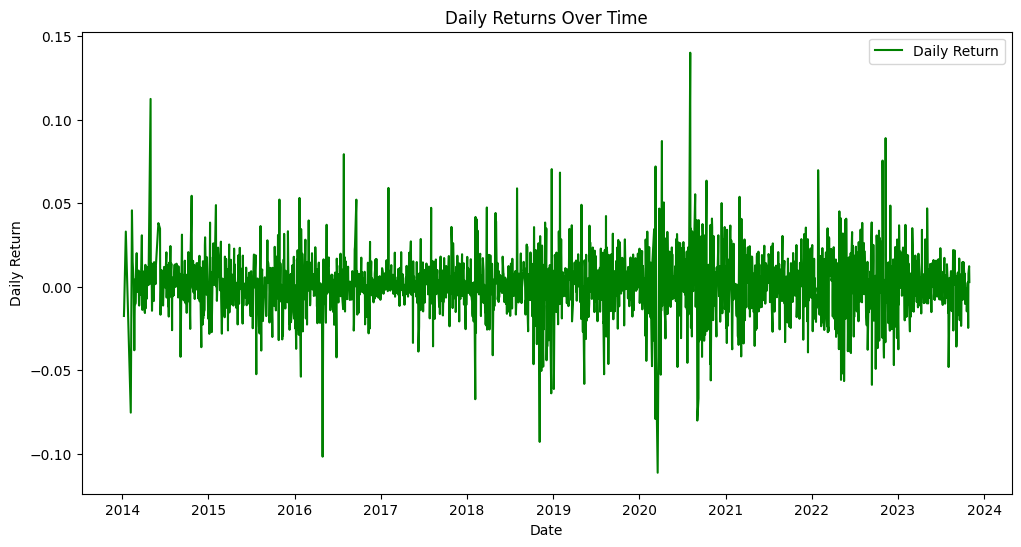

In [26]:
#Plot Daily Return
plt.figure(figsize=(12,6))
plt.plot(Apple_Stock_no_outliers['Date'], Apple_Stock_no_outliers['Daily_Return'], label='Daily Return', color='green')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [27]:
Apple_Stock_no_outliers['Daily_Return'].describe()

count    2349.000000
mean        0.001075
std         0.017718
min        -0.111281
25%        -0.007262
50%         0.000928
75%         0.010109
max         0.140087
Name: Daily_Return, dtype: float64

The average daily return for Apple stock over the given period is 0.1034%.

The minimum daily return is -12.87%,It is the largest single day decrease in closing price during the period.

The maximum daily return is 11.98%, It is The largest single day increas in closing price during the period

# Moving Average

In [28]:
# calculate Rolling statistics for moving averages for understanding Technical analysis and forecasting
window_size = 30
Apple_Stock_no_outliers['Rolling_Mean'] = Apple_Stock_no_outliers['Close'].rolling(window=window_size).mean()
Apple_Stock_no_outliers['Rolling_Std'] =Apple_Stock_no_outliers['Close'].rolling(window=window_size).std()

In [29]:
Apple_Stock_no_outliers['Rolling_Std']

0            NaN
4            NaN
5            NaN
10           NaN
24           NaN
          ...   
2470    2.928285
2471    3.303820
2472    3.528212
2473    3.566857
2474    3.523368
Name: Rolling_Std, Length: 2350, dtype: float64

The NaN values in the initial rows are expected, as they represent the period where there isn't enough data to compute the Rolling_std.

High values denoted the coincidents of some events which are caused the stock increasing uncertenally.

while low values may indicate periods of relative stability.

In [30]:
Apple_Stock_no_outliers['Rolling_Mean']

0              NaN
4              NaN
5              NaN
10             NaN
24             NaN
           ...    
2470    175.297002
2471    175.002001
2472    174.775668
2473    174.519668
2474    174.243001
Name: Rolling_Mean, Length: 2350, dtype: float64

The NaN values in the initial rows are expected, as they represent the period where there isn't enough data to compute the rolling mean.

Each value in the 'Rolling_Mean' column represents the average closing price.

we are comparing the rolling mean values with the actual closing prices to see how well the rolling mean captures the overall trend.

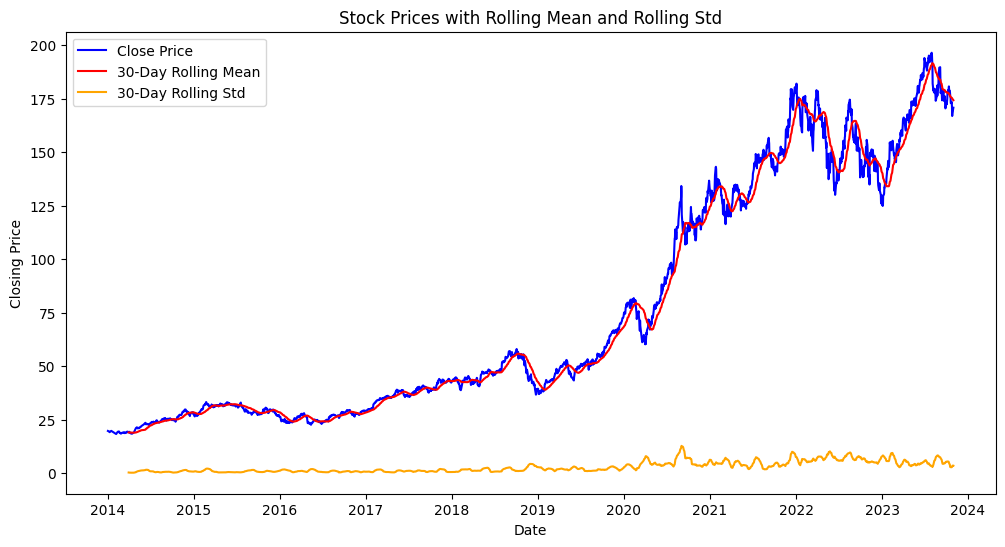

In [31]:
# Plot rolling mean and standard deviation o compare with Actual close price 
plt.figure(figsize=(12, 6))
plt.plot(Apple_Stock_no_outliers['Date'], Apple_Stock_no_outliers['Close'], label='Close Price', color='blue')
plt.plot(Apple_Stock_no_outliers['Date'], Apple_Stock_no_outliers['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', color='red')
plt.plot(Apple_Stock_no_outliers['Date'], Apple_Stock_no_outliers['Rolling_Std'], label=f'{window_size}-Day Rolling Std', color='orange')
plt.title('Stock Prices with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

An upward trend in the rolling mean should correspond to periods of generally increasing stock prices.
    
The rolling mean line shows in the plot sudden increase in the rolling mean after a decline it suggest a potential reversal from a downtrend to an uptrend.

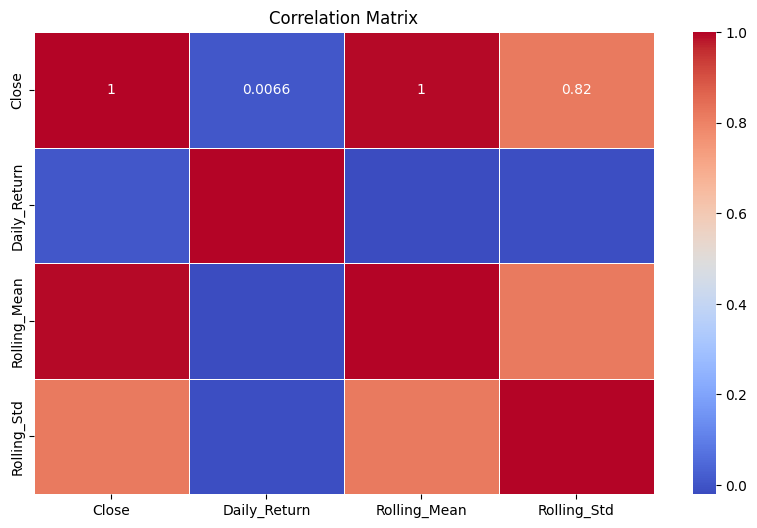

In [32]:
# Plot a correlation matrix for numerical variables 
correlation_matrix = Apple_Stock_no_outliers[['Close', 'Daily_Return', 'Rolling_Mean', 'Rolling_Std']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
correlation_matrix

,Close,Daily_Return,Rolling_Mean,Rolling_Std
Close,1.000000,0.006638,0.995647,0.820630
Daily_Return,0.006638,1.000000,-0.019986,-0.012914
Rolling_Mean,0.995647,-0.019986,1.000000,0.819506
Rolling_Std,0.820630,-0.012914,0.819506,1.000000


The very high correlation between the closing price and its rolling mean suggests that the rolling mean closely tracks the overall trend in the closing prices. 

The positive correlation between the closing price and rolling standard deviation suggests that periods of higher volatility may coincide with specific movements in the stock's price.

In [34]:
#Monthwise comparision between Stock open and close avg price
monthvise= Apple_Stock_no_outliers.groupby(Apple_Stock_no_outliers['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,76.634831,76.707228
February,76.419550,76.532485
March,73.485325,73.612717
April,75.524709,75.565781
May,75.175797,75.242861
June,76.647090,76.765818
July,79.814142,79.995662
August,86.237191,86.278095
September,85.972083,85.691953


Both the avg open and close prices exhibit a general upward trend from January to August, reaching a peak in August.

Here seems some seasonal variablity in the avg prices.like in rainy months which is June,July,August having higher open and close average price. vice versa in winter season months(December and january)having lower average of opening and closing price.

August has the highest average open and close prices among all other months.

The Average open and close Price generally follows a simmilar trend,its close price slightly trailing ope prices.

In [35]:
#Monthwise High and Low stock price
Apple_Stock_no_outliers.groupby(Apple_Stock_no_outliers['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = Apple_Stock_no_outliers.groupby(Apple_Stock_no_outliers['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = Apple_Stock_no_outliers.groupby(Apple_Stock_no_outliers['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)



In [36]:
monthvise_low

Date
January      19.119642
February     18.136070
March        18.671785
April        18.261786
May          20.726070
June         22.412500
July         23.142500
August       23.320000
September    24.512501
October      23.852501
November     26.020000
December     26.205000
Name: Low, dtype: float64

In the January,Feb and March months are generally show relatively low loswest prices.this might be causes of such factore like Year End,lower trading  acticity.

From March to August, there is a consistent increase in the lowest prices.

August stands out as the month with the highest lowest prices.

There is a slight dip in the lowest prices in September compared to August.

In [37]:
monthvise_high

Date
January      182.940002
February     176.649994
March        179.610001
April        178.490005
May          179.350006
June         194.479996
July         198.229996
August       196.729996
September    189.979996
October      182.339996
November     165.699997
December     182.130005
Name: High, dtype: float64

In the January,Feb and March months are indicating relatively high highest prices.it may be effect of new year resolutions and release of annual reports.

June, July, and August stand out as the months with the highest highest price. Those are seasonally strong months for the stock.

From September to December, there is a decline in the highest prices, with November showing a notable decrease. This period denotes a phase of reduced market activity as the year progresses.

In [38]:
#Monthwise low and highest stock price
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

The chart illustrates the seasonal variations in both the highest and lowest stock prices throughout the year.

Months such as June, July, and August stand out with the highest stock prices.

Particularly January and February, show relatively lower stock prices. 

In [39]:
# Trend comparision between stock open price, close price, high price, low price
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(Apple_Stock_no_outliers, x=Apple_Stock_no_outliers.Date, y=[Apple_Stock_no_outliers['Open'], Apple_Stock_no_outliers['Close'], 
                                         Apple_Stock_no_outliers['High'], Apple_Stock_no_outliers['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Prepare Stock close price

In [40]:
# make separate dataframe of closed price
closedf = Apple_Stock_no_outliers[['Date', 'Close']]
closedf.shape

(2350, 2)

In [41]:
#Plotting Stock Close Price cart
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [42]:
# we can consider the only 10 months data from 01-01-2023 to 31-10-2023
closedf = closedf[ closedf['Date'] > '2023-01-01']
closedf.head()

,Date,Close
2266,2023-01-03,125.070000
2267,2023-01-04,126.360001
2268,2023-01-05,125.019997
2269,2023-01-06,129.619995
2270,2023-01-09,130.149994


In [43]:
closedf.shape

(209, 2)

# Time Series Decomposition
# 1. Seasonality
# 2. Trend

# Additive Seasonal Decomposition

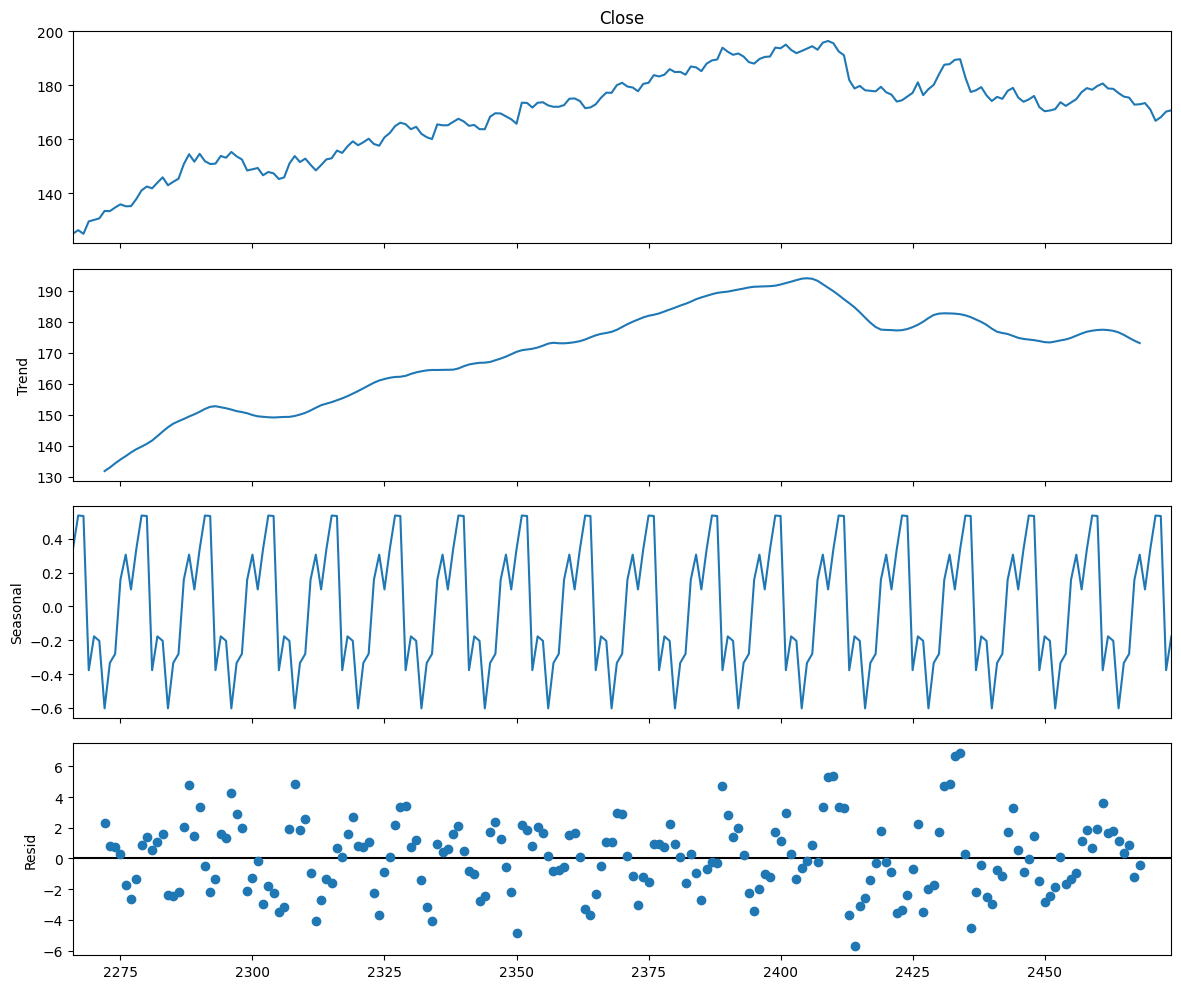

In [44]:
decompose_ts_add = seasonal_decompose(closedf.Close, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

# Normlizing close price

In [45]:
del closedf['Date'] 
scaler=MinMaxScaler(feature_range=(0,1))
close_stock=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(close_stock.shape)


(209, 1)


# Split data for training and testing


In [46]:
# Ratio for training and testing data is 65:35
training_size=int(len(close_stock)*0.65)
test_size=len(close_stock)-training_size
train_data,test_data=close_stock[0:training_size,:],close_stock[training_size:len(close_stock),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (135, 1)
test_data:  (74, 1)


# Create new dataset according to requirement of time-series prediction

In [47]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
# reshape into X=t,t+1,t+2,t+3,.....,t+14 and Y=t+15 
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (119, 15)
y_train:  (119,)
X_test:  (58, 15)
y_test (58,)


In [49]:
# reshape input value X from 2D array to  3d array which is required 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (119, 15, 1)
X_test:  (58, 15, 1)


#  Model Building

# 1.LSTM Model
(Long_Short_Term Memory)

In [50]:
#LSTM model structure
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
    

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Lets train the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
24/24 [==============================] - 5s 54ms/step - loss: 0.1196 - val_loss: 0.0119
Epoch 2/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0131 - val_loss: 0.0081
Epoch 3/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 4/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0134
Epoch 5/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0136
Epoch 6/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0157
Epoch 7/10
24/24 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0101
Epoch 8/10
24/24 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0201
Epoch 9/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0118
Epoch 10/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 0.0172


In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 6ms/step


((119, 1), (58, 1))

In [54]:
# Transform back to original 2D array form to matrix form
 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [55]:
LSTM_RMSE = math.sqrt(mean_squared_error(original_ytest,test_predict))
LSTM_RMSE

9.361356481779005

In [56]:
#Comparision between original stock close price vs predicted close price
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


Train predicted data:  (209, 1)
Test predicted data:  (209, 1)


In [57]:
numerical_index = np.arange(len(closedf))
plotdf = pd.DataFrame({'Timestamp': numerical_index, 'original_close': closedf['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(-1).tolist(),
                      'test_predicted_close': testPredictPlot.reshape(-1).tolist()})

fig = px.line(plotdf,x='Timestamp', y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=12, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Predicting next 10 days

In [58]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [59]:
lst_output

[[0.7556697130203247],
 [0.7443040013313293],
 [0.733809232711792],
 [0.7268984317779541],
 [0.7222491502761841],
 [0.7209075689315796],
 [0.7223129868507385],
 [0.7253799438476562],
 [0.731420636177063],
 [0.7378943562507629]]

In [60]:
#lst_output convert into original form with aplly invers transformation
next_predicted_days_value= scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
next_predicted_days_value

[178.9974844747203,
 178.18563168530682,
 177.4359903596105,
 176.94235184679746,
 176.61025366770718,
 176.51442451185267,
 176.6148135142471,
 176.83388625347288,
 177.26537290840588,
 177.7277907352459]

This is the Next 10 days predicted close values of stock

# Plotting last 15 days and next predicted 10 days

In [88]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [96]:
temp_mat = np.empty((len(last_days)+pred_days +1,1))
temp_mat[:] = np.nan
#temp_mat_ = np.empty((len(pred_days) +1,1))
#temp_mat_ =((pred_days) +1,1)
temp_mat= temp_mat.reshape(1,-1).tolist()[0]
#temp_mat_ = np.empty((len(temp_mat)+pred_days))
#temp_mat_[:] = np.nan
#temp_mat_= temp_mat_.reshape(1,-1).tolist()[0]
temp_mat

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])



In [95]:
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Plotting whole closing stock price with prediction

In [61]:
lstmdf=close_stock.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
lstmdf

[125.06999969482422,
 126.36000061035156,
 125.0199966430664,
 129.6199951171875,
 130.14999389648438,
 130.72999572753906,
 133.49000549316406,
 133.41000366210938,
 134.75999450683594,
 135.94000244140625,
 135.2100067138672,
 135.27000427246094,
 137.8699951171875,
 141.11000061035156,
 142.52999877929688,
 141.86000061035156,
 143.96000671386716,
 145.92999267578125,
 143.0,
 144.2899932861328,
 145.42999267578125,
 150.82000732421875,
 154.5,
 151.72999572753906,
 154.64999389648438,
 151.9199981689453,
 150.8699951171875,
 151.00999450683594,
 153.85000610351562,
 153.1999969482422,
 155.3300018310547,
 153.7100067138672,
 152.5500030517578,
 148.47999572753906,
 148.91000366210938,
 149.39999389648438,
 146.7100067138672,
 147.9199981689453,
 147.41000366210938,
 145.30999755859375,
 145.91000366210938,
 151.02999877929688,
 153.8300018310547,
 151.60000610351562,
 152.8699951171875,
 150.58999633789062,
 148.5,
 150.47000122070312,
 152.58999633789065,
 152.9900054931641,
 155.

In [98]:
names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

 # 2.ARIMA MODEL
 
 # checking  Time Series data is stationary or Not

In [99]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

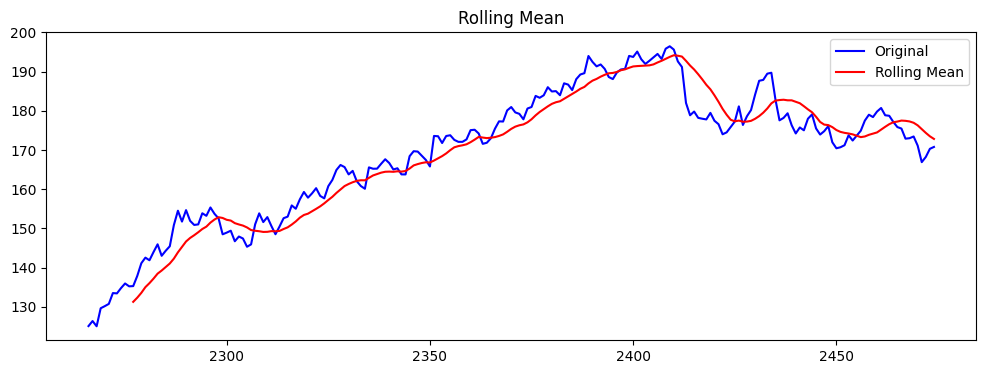

Results of Dickey Fuller Test:
Test Statistic                  -2.823633
p-value                          0.054976
#Lags Used                       0.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


In [100]:
plt.figure(figsize=(12,4))
Apple_Stock_= pd.DataFrame()
Apple_Stock_['Close'] = closedf[['Close']]
test_stationarity(Apple_Stock_)

In [101]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [102]:
adf_test(Apple_Stock_)

Fail to reject the null hypothesis
Data is non-stationary


Here Time Series Data is Non-Stationary we need to convert it into stationary

#  Box Cox Transformation 

,Close
2266,4.828874
2267,4.839135
2268,4.828474
2269,4.864607
2270,4.868688


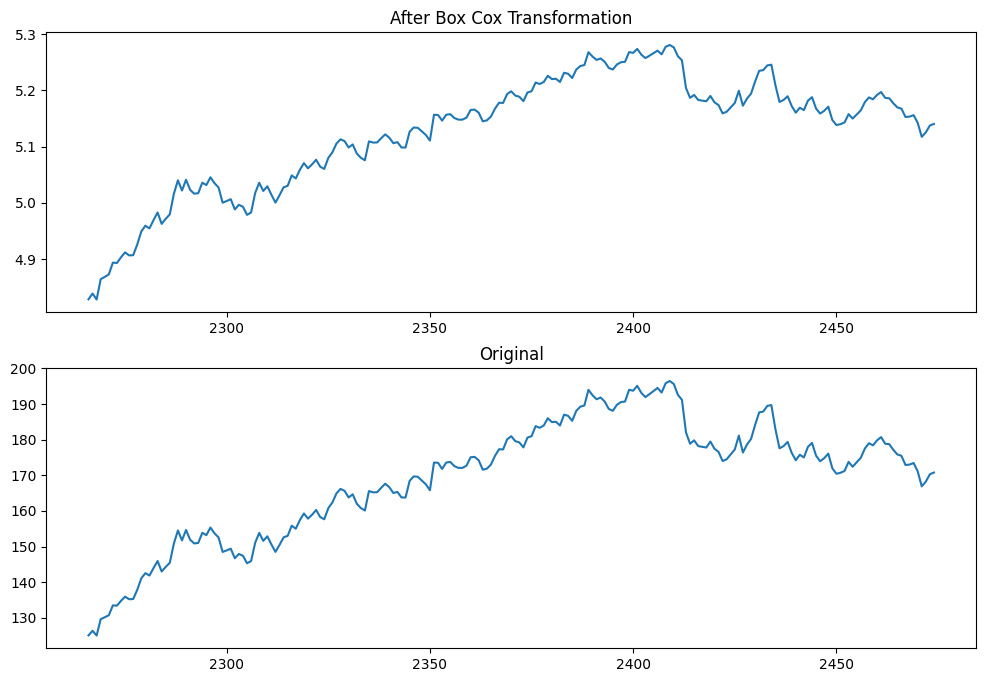

In [103]:
from scipy.stats import boxcox
Apple_Stock_boxcox = pd.DataFrame()
Apple_Stock_boxcox['Close'] = pd.Series(boxcox(closedf['Close'], lmbda=0), closedf.index)
display(Apple_Stock_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(Apple_Stock_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(closedf, label='original')
axis[1].set_title('Original')
plt.show()

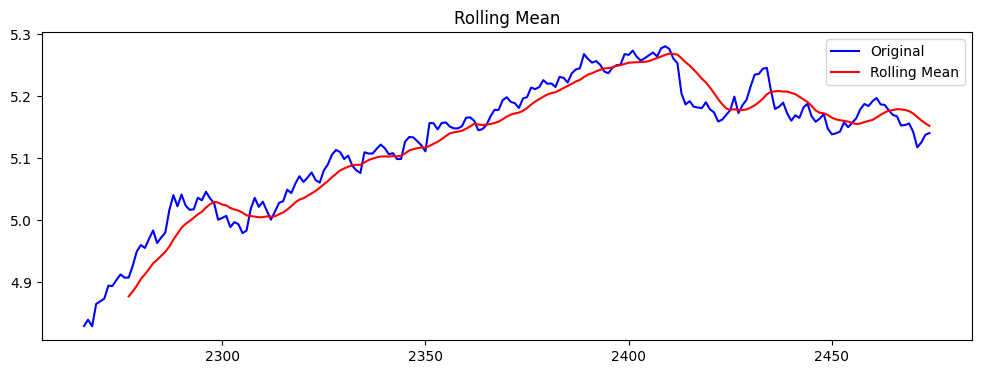

Results of Dickey Fuller Test:
Test Statistic                  -3.244736
p-value                          0.017537
#Lags Used                       0.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


In [104]:
plt.figure(figsize=(12,4))
test_stationarity(Apple_Stock_boxcox)

In [105]:
adf_test(Apple_Stock_boxcox)

Reject the null hypothesis
Data is stationary


Here we got the stationary data but for removing trend and seasonality we aplly differencing 

# Differencing of the Box-Cox Transformation

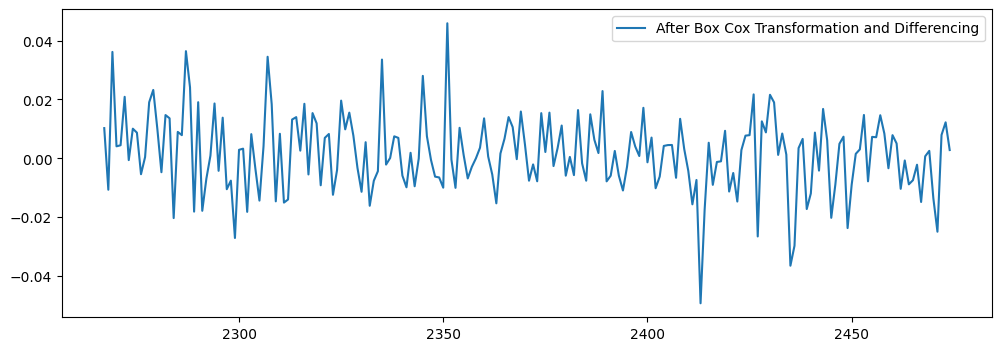

In [106]:
Apple_Stock_boxcox_diff =Apple_Stock_boxcox - Apple_Stock_boxcox.shift()
Apple_Stock_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(Apple_Stock_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

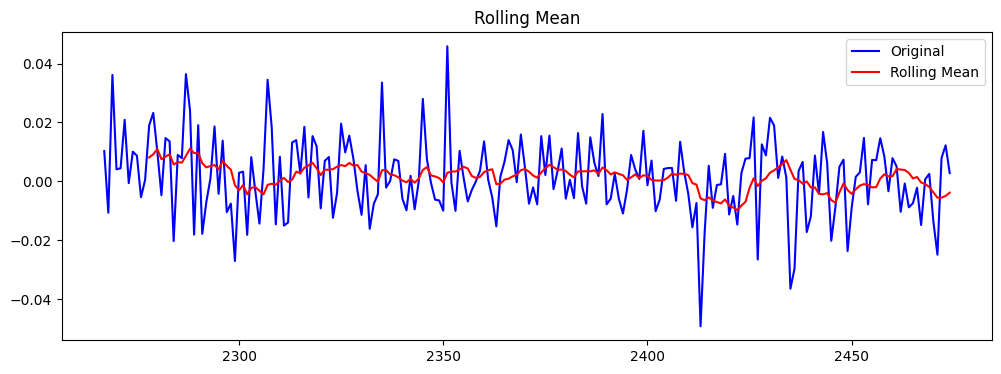

Results of Dickey Fuller Test:
Test Statistic                -1.323850e+01
p-value                        9.273453e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.070000e+02
Critical Value (1%)           -3.462342e+00
Critical Value (5%)           -2.875606e+00
Critical Value (10%)          -2.574267e+00
dtype: float64


In [107]:
plt.figure(figsize=(12,4))
test_stationarity(Apple_Stock_boxcox_diff)

In [108]:
adf_test(Apple_Stock_boxcox_diff)

Reject the null hypothesis
Data is stationary


so after differencing we get data is satationary and  seasonaly trend free

# ACF plots and PACF plots

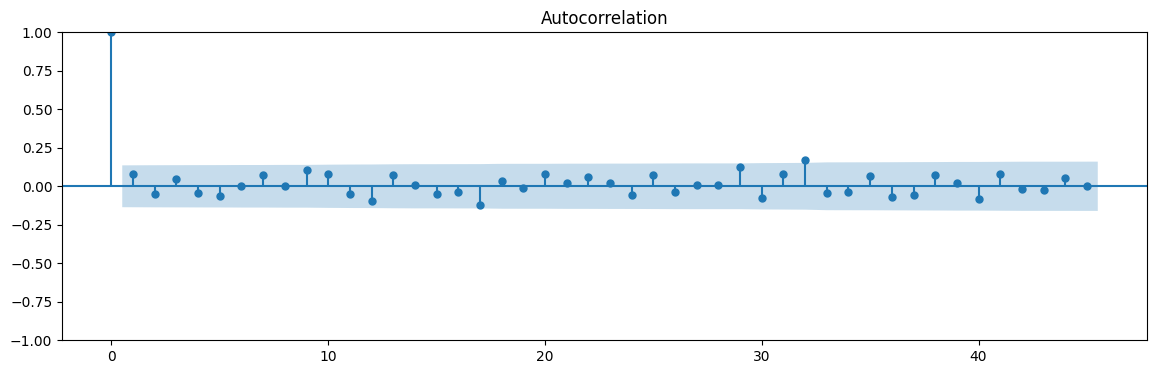

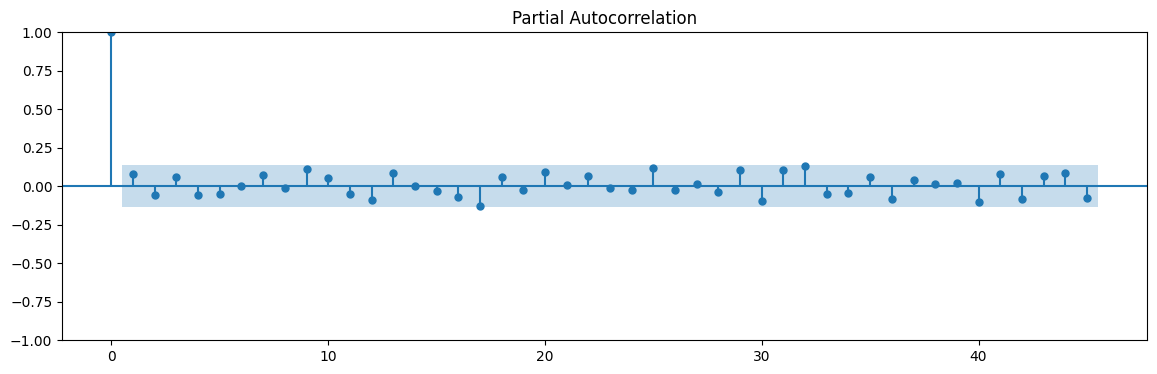

In [109]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_acf(Apple_Stock_boxcox_diff['Close'],lags=45)
    tsa_plots.plot_pacf(Apple_Stock_boxcox_diff['Close'],lags=45)
    plt.show()

## Building The Time Series Forecasting with Optimal Value using ARIMA

In [110]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [111]:
# Building AutoAmrima model to get best parameters (p,q,d) for ARIMA Model
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-573.948, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-572.227, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-572.317, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-567.431, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-570.266, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.336 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  135
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 288.974
Date:                Fri, 02 Feb 2024   AIC                           -573.948
Time:                        22:54:51   BIC                           -568.152
Sample:                             0   HQIC                          -571.593
                                - 135                                       

In [112]:
# Build and Train ARIMA Model
p, d, q = 0, 1, 0  
model = ARIMA(Apple_Stock_boxcox_diff['Close'], order=(p, d, q))
result = model.fit()
# Print model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  208
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 540.797
Date:                Fri, 02 Feb 2024   AIC                          -1079.594
Time:                        22:54:51   BIC                          -1076.261
Sample:                             0   HQIC                         -1078.246
                                - 208                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   2.94e-05     10.696      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  38.58   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               0.69   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
# Prediction of next '10' days 
n_forecast = 10  
prediction = result.get_forecast(steps=n_forecast)


# Extract forecasted values and confidence intervals
prediction_values = prediction.predicted_mean
#conf_int = forecast.conf_int()

# Create a DataFrame with the forecasted values and confidence intervals
prediction_df = pd.DataFrame({'Prediction' : prediction_values,})#, index=prediction_values.index)
    
prediction_df

,Prediction
208,0.002815
209,0.002815
210,0.002815
211,0.002815
212,0.002815
213,0.002815
214,0.002815
215,0.002815
216,0.002815
217,0.002815


In [114]:
# next 10 days predicting closing price of stock
next_predicted_days_value= scaler.inverse_transform(np.array(prediction_df).reshape(-1,1)).reshape(1,-1).tolist()[0]
next_predicted_days_value

[125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853,
 125.22105925834853]

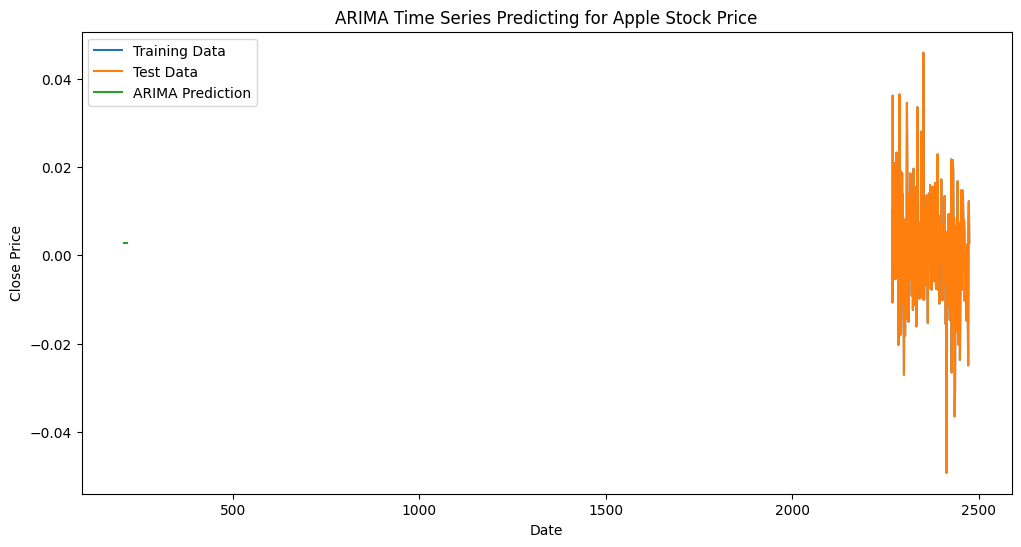

In [118]:
#Ploting Prediction data with test, and train data
plt.figure(figsize=(12, 6))
plt.plot(Apple_Stock_boxcox_diff['Close'], label='Training Data')
plt.plot(Apple_Stock_boxcox_diff['Close'], label='Test Data')
plt.plot(prediction_df['Prediction'], label='ARIMA Prediction')
plt.title('ARIMA Time Series Predicting for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.legend()
plt.show()

In [119]:
# Align lengths by taking the first min_length elements for avoiding index mismatch
min_length = min(len(test_data), len(prediction_df['Prediction']))
Apple_Stock_close = test_data[:min_length]
prediction_close = prediction_df['Prediction'][:min_length]

In [120]:
# Calculate Mean squared error
mse = mean_squared_error(Apple_Stock_close, prediction_close)
# Print the result
print(f'Mean Squared Error for Apple_Stock_close (MSE): {mse}')


Mean Squared Error for Apple_Stock_close (MSE): 0.9333518366294232


In [121]:
# Calculate Root Mean Squared Error
ARIMA_RMSE = math.sqrt(mean_squared_error(Apple_Stock_close, prediction_close))
print("Test data RMSE: ",ARIMA_RMSE)

Test data RMSE:  0.9661013593973581


# Plotting last 15 days and next predicted 10 days

In [122]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [123]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(prediction_df).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])



In [124]:
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Plotting whole closing stock price with prediction

In [125]:
arimadf=close_stock.tolist()
arimadf.extend((np.array(prediction_df).reshape(-1,1)).tolist())
arimadf=scaler.inverse_transform(arimadf).reshape(1,-1).tolist()[0]
arimadf

[125.06999969482422,
 126.36000061035156,
 125.0199966430664,
 129.6199951171875,
 130.14999389648438,
 130.72999572753906,
 133.49000549316406,
 133.41000366210938,
 134.75999450683594,
 135.94000244140625,
 135.2100067138672,
 135.27000427246094,
 137.8699951171875,
 141.11000061035156,
 142.52999877929688,
 141.86000061035156,
 143.96000671386716,
 145.92999267578125,
 143.0,
 144.2899932861328,
 145.42999267578125,
 150.82000732421875,
 154.5,
 151.72999572753906,
 154.64999389648438,
 151.9199981689453,
 150.8699951171875,
 151.00999450683594,
 153.85000610351562,
 153.1999969482422,
 155.3300018310547,
 153.7100067138672,
 152.5500030517578,
 148.47999572753906,
 148.91000366210938,
 149.39999389648438,
 146.7100067138672,
 147.9199981689453,
 147.41000366210938,
 145.30999755859375,
 145.91000366210938,
 151.02999877929688,
 153.8300018310547,
 151.60000610351562,
 152.8699951171875,
 150.58999633789062,
 148.5,
 150.47000122070312,
 152.58999633789065,
 152.9900054931641,
 155.

In [126]:
names = cycle(['Close price'])

fig = px.line(arimadf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# 3.Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [127]:
my_order = (0,1,0)
my_seasonal_order = (0, 1, 0, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
Result=model.fit()
y_hat_sarima= Apple_Stock_boxcox_diff.copy()

In [128]:
#summary of the model
print(Result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  135
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 212.742
Date:                            Fri, 02 Feb 2024   AIC                           -423.484
Time:                                    22:59:49   BIC                           -420.680
Sample:                                         0   HQIC                          -422.346
                                            - 135                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0018      0.000      9.339      0.000       0.001       0.002
Ljung-Box (L1) (Q):                

In [129]:
# Prediction of next '10' days 
n_forecast = 10  
Prediction = Result.get_forecast(steps=n_forecast)


# Extract forecasted values and confidence intervals
Prediction_values = Prediction.predicted_mean
#conf_int = forecast.conf_int()
# Create a time index for the forecasted values
#forecast_index = pd.date_range(start=pd.Timestamp.now().date(), periods=len(Prediction_values), freq= M)

# Create a DataFrame with the forecasted values 
Prediction_df = pd.DataFrame({'Prediction' : Prediction_values,})#, index=Prediction_values.index)
    
Prediction_df

,Prediction
0,1.023240
1,1.002100
2,0.986280
3,0.993000
4,0.977180
5,0.948201
6,0.940781
7,0.964441
8,0.975220
9,0.977321


In [130]:
# next 10 days predicting closing price of stock
next_predicted_days_value= scaler.inverse_transform(np.array(Prediction_df).reshape(-1,1)).reshape(1,-1).tolist()[0]
next_predicted_days_value

[198.11000051802455,
 196.60000600300424,
 195.4700011576505,
 195.9499968632337,
 194.8199919819951,
 192.74999989649837,
 192.22000116111317,
 193.91000360385698,
 194.67999257959826,
 194.83000177225162]

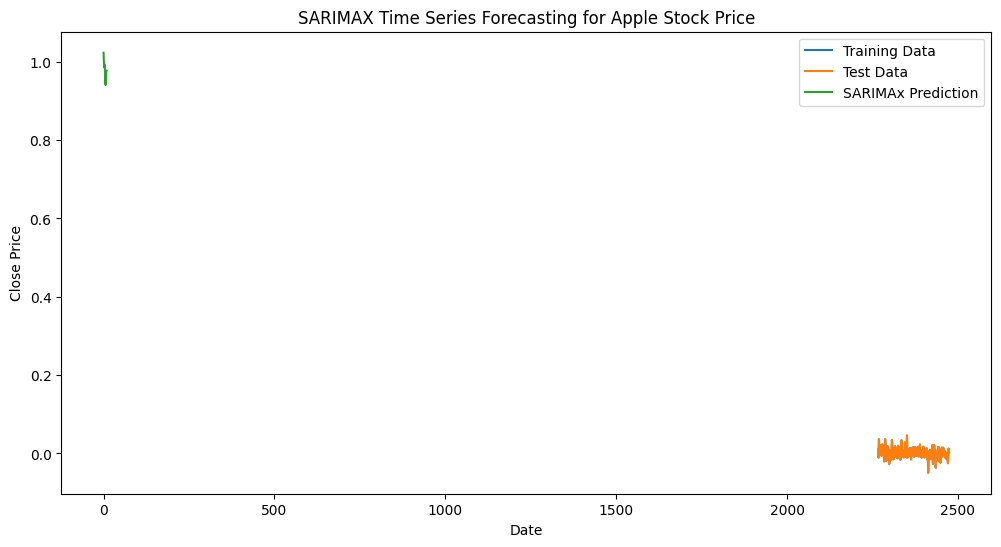

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(Apple_Stock_boxcox_diff['Close'], label='Training Data')
plt.plot(Apple_Stock_boxcox_diff['Close'], label='Test Data')
plt.plot(Prediction_df['Prediction'], label='SARIMAx Prediction')
plt.title('SARIMAX Time Series Forecasting for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.legend()
plt.show()

In [133]:
# Align lengths by taking the first min_length elements
min_length = min(len(test_data), len(Prediction_df['Prediction']))
Apple_Stock_close = test_data[:min_length]
Prediction_close = Prediction_df['Prediction'][:min_length]

In [134]:
# Calculate MSE
mse = mean_squared_error(Apple_Stock_close, Prediction_close)
# Print the result
print(f'Mean Squared Error for Apple_Stock_close (MSE): {mse}')


Mean Squared Error for Apple_Stock_close (MSE): 0.001111903592240731


In [135]:
# Calculate RMSE
SARIMAX_RMSE = math.sqrt(mean_squared_error(Apple_Stock_close, Prediction_close))
print("Test data SARIMAX_RMSE: ",SARIMAX_RMSE)

Test data SARIMAX_RMSE:  0.03334521843144428


# Plotting last 15 days and next predicted 10 days

In [137]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [138]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])



In [139]:
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Plotting whole closing stock price with prediction

In [141]:
sarimaxdf=close_stock.tolist()
sarimaxdf.extend((np.array(Prediction_df).reshape(-1,1)).tolist())
sarimaxdf=scaler.inverse_transform(sarimaxdf).reshape(1,-1).tolist()[0]
sarimaxdf

[125.06999969482422,
 126.36000061035156,
 125.0199966430664,
 129.6199951171875,
 130.14999389648438,
 130.72999572753906,
 133.49000549316406,
 133.41000366210938,
 134.75999450683594,
 135.94000244140625,
 135.2100067138672,
 135.27000427246094,
 137.8699951171875,
 141.11000061035156,
 142.52999877929688,
 141.86000061035156,
 143.96000671386716,
 145.92999267578125,
 143.0,
 144.2899932861328,
 145.42999267578125,
 150.82000732421875,
 154.5,
 151.72999572753906,
 154.64999389648438,
 151.9199981689453,
 150.8699951171875,
 151.00999450683594,
 153.85000610351562,
 153.1999969482422,
 155.3300018310547,
 153.7100067138672,
 152.5500030517578,
 148.47999572753906,
 148.91000366210938,
 149.39999389648438,
 146.7100067138672,
 147.9199981689453,
 147.41000366210938,
 145.30999755859375,
 145.91000366210938,
 151.02999877929688,
 153.8300018310547,
 151.60000610351562,
 152.8699951171875,
 150.58999633789062,
 148.5,
 150.47000122070312,
 152.58999633789065,
 152.9900054931641,
 155.

In [142]:
names = cycle(['Close price'])

fig = px.line(sarimaxdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Compairing All Three model with RMSE valuese

In [143]:
actual_values = closedf[:25]
# Print RMSE values for comparison
print(f'LSTM RMSE: {LSTM_RMSE}')
print(f'ARIMA RMSE: {ARIMA_RMSE}')
print(f'SARIMAX RMSE: {SARIMAX_RMSE}')

LSTM RMSE: 9.361356481779005
ARIMA RMSE: 0.9661013593973581
SARIMAX RMSE: 0.03334521843144428


In [144]:
Evaluation = {"Models":pd.Series(["LSTM","ARIMA","SARIMA"]),
                "RMSE_Values":pd.Series([LSTM_RMSE,ARIMA_RMSE,SARIMAX_RMSE])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,RMSE_Values
0,SARIMA,0.033345
1,ARIMA,0.966101
2,LSTM,9.361356


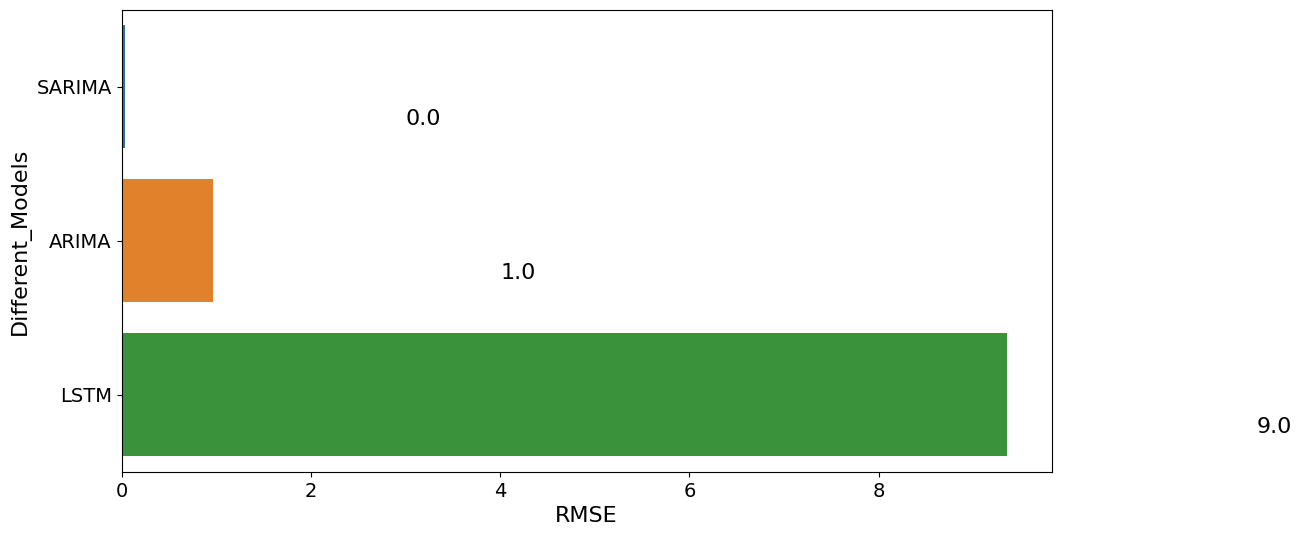

In [145]:
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Different_Models', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 16)

plt.show()

SARIMAX Model has lowest RMSE value it means the model is performing better than other two model

# Saved the Trained Model 

In [149]:
import pickle
Filename = 'Sarimax_model.sav'
pickle.dump(Result, open("Sarimax_model.sav", "wb"))

# Load the save model

In [151]:
loaded_model = pickle.load(open('Sarimax_model.sav','rb'))

In [148]:
# Prediction of next '10' days 
n_forecast = 10  
Prediction = loaded_model.get_forecast(steps=n_forecast)


# Extract forecasted values and confidence intervals
Prediction_values = Prediction.predicted_mean
#conf_int = forecast.conf_int()
# Create a time index for the forecasted values
#forecast_index = pd.date_range(start=pd.Timestamp.now().date(), periods=len(Prediction_values), freq= M)

# Create a DataFrame with the forecasted values 
Prediction_df = pd.DataFrame({'Prediction' : Prediction_values,})#, index=Prediction_values.index)
    
next_predicted_days_value= scaler.inverse_transform(np.array(Prediction_df).reshape(-1,1)).reshape(1,-1).tolist()[0]
next_predicted_days_value

[198.11000051802455,
 196.60000600300424,
 195.4700011576505,
 195.9499968632337,
 194.8199919819951,
 192.74999989649837,
 192.22000116111317,
 193.91000360385698,
 194.67999257959826,
 194.83000177225162]